# Benchmarking Dimensionality Reduction Algorithms on Human Genome!

## Importing Libraries

In [1]:
from script.preprocessing import load_data, make_plot_ready
from script.pca import perform_PCA
from script.umap import perform_UMAP
from script.tsne import perform_TSNE
from script.MDS import perform_MDS
from script.isomap import perform_Isomap
from script.autoencoder import perform_autoEncoder
from script.plotting import PlotClusters
from matplotlib import pyplot as plt
from script.evaluate import compute_score
import warnings
warnings.filterwarnings('ignore')

/Users/nirajyagnik/Documents/Global-Ancestry-Comparison/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Loading Data

In [2]:
# Accept preprocessed chromosomes only!
while True:
    chromNo = int(input("Enter a chromosone number from 1, 16, 17, 21"))
    if chromNo not in [1, 16, 17, 21]:
        continue
    break

print("Running on Chromosome Number:", chromNo)

Running on Chromosome Number: 16


In [3]:
data, genotypes = load_data("1kg_chr"+str(chromNo)+"_pca_recode.raw")

In [4]:
data.head()

,FID,IID,PAT,MAT,SEX,PHENOTYPE,rs8056400_T,rs8466_G,rs216590_G,rs2541593_C,rs216596_A,rs2541594_C,rs1045001_T,rs216600_T,rs216605_G,rs2562148_C,rs216606_A,rs216614_A,rs9936565_T,rs1013358_C,rs710079_T,rs710080_G,rs2541632_C,rs2562182_G,rs2541622_A,rs6600233_T,rs12927713_A,rs798613_T,rs798612_A,rs11248850_A,rs11865131_A,rs13331107_G,rs2562164_G,rs2857998_A,rs2562189_C,rs2562188_A,rs2562185_A,rs2858944_A,rs7202152_G,rs12923613_T,...,rs4785759_C,rs9939542_C,rs7201721_G,rs4785763_A,rs11076650_G,rs9936896_C,rs2241085_T,rs11076653_T,rs4362387_T,rs10852628_T,rs9936215_G,rs11648785_T,rs2241039_G,rs3743829_T,rs3743827_A,rs3785183_T,rs2302513_T,rs4785766_C,rs868045_G,rs7498985_A,rs3785181_T,rs2241035_T,rs2241032_A,rs3743824_G,rs1048149_T,rs869048_G,rs4785612_C,rs11639655_A,rs11076663_C,rs8046635_A,rs3809643_G,rs7206111_T,rs9935461_T,rs9927964_C,rs3826200_T,rs11642823_C,rs11641713_A,rs12925933_C,rs12446019_G,rs4785775_A
0,HG00096,HG00096,0,0,0,-9,0,0,1,1,1,1,1,1,0,1,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,1,1,1,1,0,1,1,...,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,2,0,2,0,2,0,2,0,0,0,0,0,0,0,0,0,2,0,0
1,HG00097,HG00097,0,0,0,-9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,2,2,0,0,2,2,2,1,0,1,1,...,1,1,0,0,0,0,0,0,0,2,2,0,2,2,2,0,0,0,2,2,0,2,0,2,0,2,0,2,0,0,0,0,0,0,0,0,0,2,0,0
2,HG00099,HG00099,0,0,0,-9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,2,2,0,0,2,2,2,1,0,0,2,...,1,0,1,0,1,1,0,0,0,1,0,1,1,0,0,2,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,HG00100,HG00100,0,0,0,-9,0,0,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,2,2,0,0,2,2,0,0,2,2,2,1,0,0,1,...,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,1,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1
4,HG00101,HG00101,0,0,0,-9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,1,1,0,0,2,2,2,1,0,0,2,...,2,0,0,0,0,0,0,0,0,2,0,2,1,1,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1


## PCA

Score: 0.4


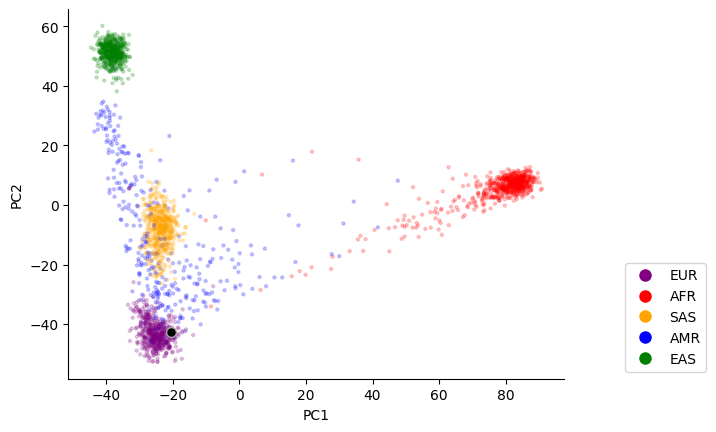

In [5]:
prefix = "PC"
n_components = 10
pcs = perform_PCA(genotypes, n_components)
pca_df = make_plot_ready(data, pcs, n_components, prefix)
print('Score:', compute_score(pca_df,prefix,pcx=1, pcy=2))
PlotClusters(pca_df, 1, 2, prefix, "superpop", ["mgymrek"])

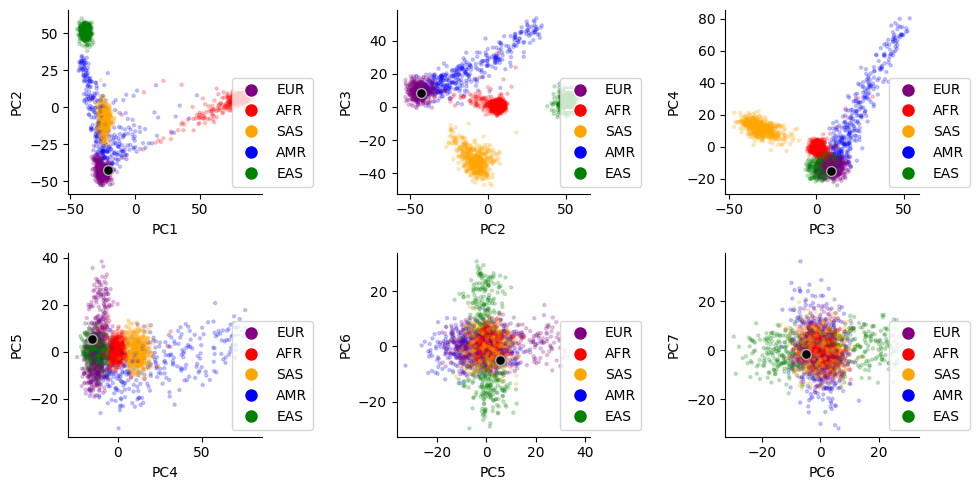

In [6]:
fignum = 1
prefix = 'PC'
fig = plt.figure()
fig.set_size_inches((10, 5))
for pc in range(1, 7):
    ax = fig.add_subplot(2, 3, fignum)
    use_legend=(pc==6)
    PlotClusters(pca_df, pc, pc+1, prefix, "superpop", ["mgymrek"],ax=ax)
    fignum += 1
fig.tight_layout()

## UMAP

Score: 0.7


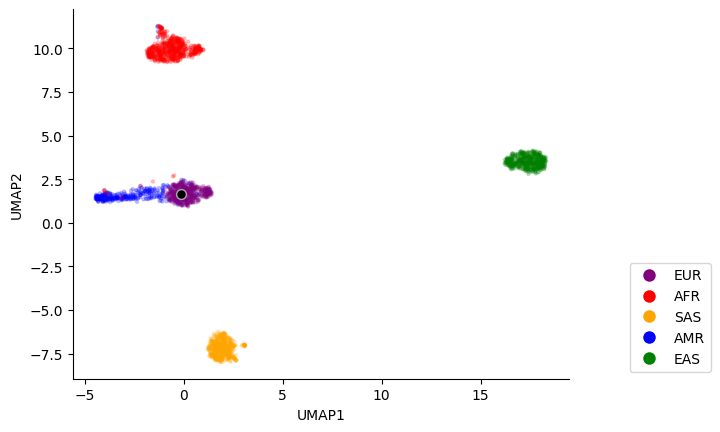

In [7]:
prefix = "UMAP"
n_components = 2
pcs = perform_UMAP(genotypes)
umap_df = make_plot_ready(data, pcs.T, n_components, prefix)
print('Score:', compute_score(umap_df,prefix,pcx=1, pcy=2))
PlotClusters(umap_df, 1, 2, prefix, "superpop", ["mgymrek"])

## TSNE

Score: 0.72


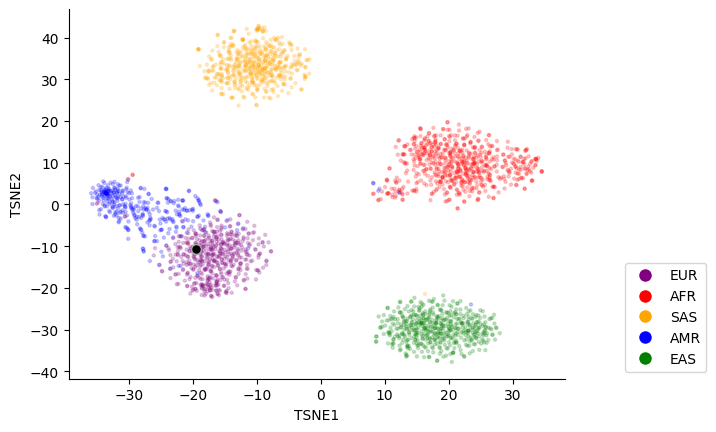

In [8]:
prefix = "TSNE"
n_components = 2
pcs = perform_TSNE(genotypes, n_components)
tsne_df = make_plot_ready(data, pcs.T, n_components, prefix)
print('Score:', compute_score(tsne_df,prefix,pcx=1, pcy=2))
PlotClusters(tsne_df, 1, 2, prefix, "superpop", ["mgymrek"])

## MDS

Score: 0.26


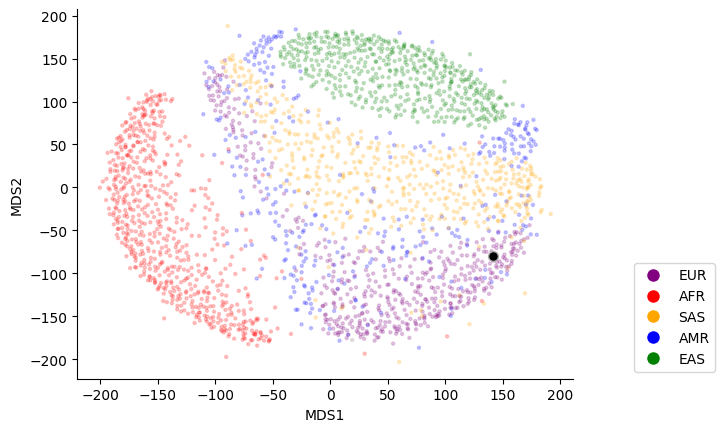

In [10]:
prefix = "MDS"
n_components = 2
pcs = perform_MDS(genotypes, n_components)
mds_df = make_plot_ready(data, pcs.T, n_components, prefix)
print('Score:', compute_score(mds_df,prefix,pcx=1, pcy=2))
PlotClusters(mds_df, 1, 2, prefix, "superpop", ["mgymrek"])

## Isomap

Score: 0.54


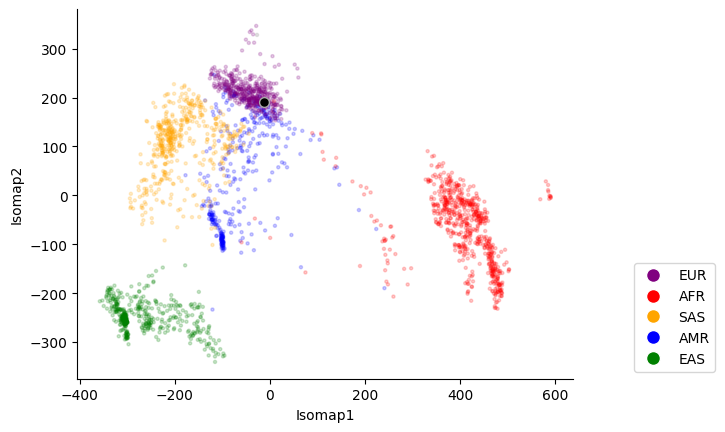

In [11]:
prefix = "Isomap"
n_components = 2
pcs = perform_Isomap(genotypes, n_components)
isomap_df = make_plot_ready(data, pcs.T, n_components, prefix)
print('Score:', compute_score(isomap_df,prefix,pcx=1, pcy=2))
PlotClusters(isomap_df, 1, 2, prefix, "superpop", ["mgymrek"])

## Autoencoders

Epoch 1/100
3/3 [==============================] - 1s 259ms/step - loss: 1.0001 - val_loss: 0.9377
Epoch 2/100
3/3 [==============================] - 1s 337ms/step - loss: 0.9978 - val_loss: 0.9336
Epoch 3/100
3/3 [==============================] - 1s 243ms/step - loss: 0.9826 - val_loss: 0.9286
Epoch 4/100
3/3 [==============================] - 1s 212ms/step - loss: 0.9661 - val_loss: 0.9242
Epoch 5/100
3/3 [==============================] - 1s 217ms/step - loss: 0.9576 - val_loss: 0.9181
Epoch 6/100
3/3 [==============================] - 1s 211ms/step - loss: 0.9500 - val_loss: 0.9117
Epoch 7/100
3/3 [==============================] - 1s 212ms/step - loss: 0.9433 - val_loss: 0.9073
Epoch 8/100
3/3 [==============================] - 1s 205ms/step - loss: 0.9391 - val_loss: 0.9061
Epoch 9/100
3/3 [==============================] - 1s 215ms/step - loss: 0.9365 - val_loss: 0.9043
Epoch 10/100
3/3 [==============================] - 1s 210ms/step - loss: 0.9343 - val_loss: 0.9045
Epoch 11/

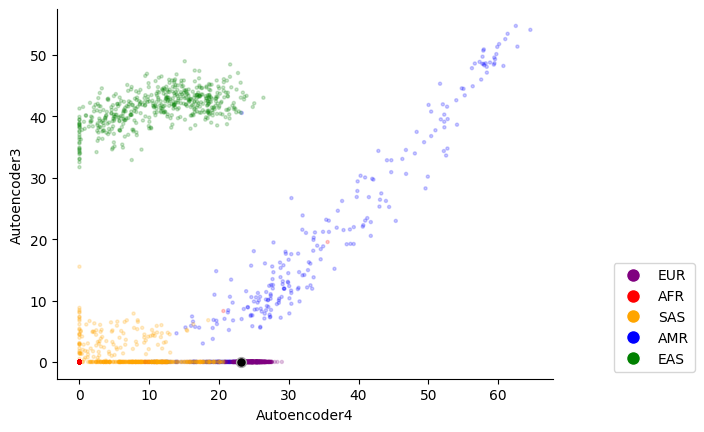

In [12]:
prefix = "Autoencoder"
n_components = 4
pcs = perform_autoEncoder(genotypes, n_components)
ae_df = make_plot_ready(data, pcs.T, n_components, prefix)
print('Score:', compute_score(ae_df,prefix,pcx=1, pcy=2))
PlotClusters(ae_df, 4, 3, prefix, "superpop", ["mgymrek"])

## Plotting

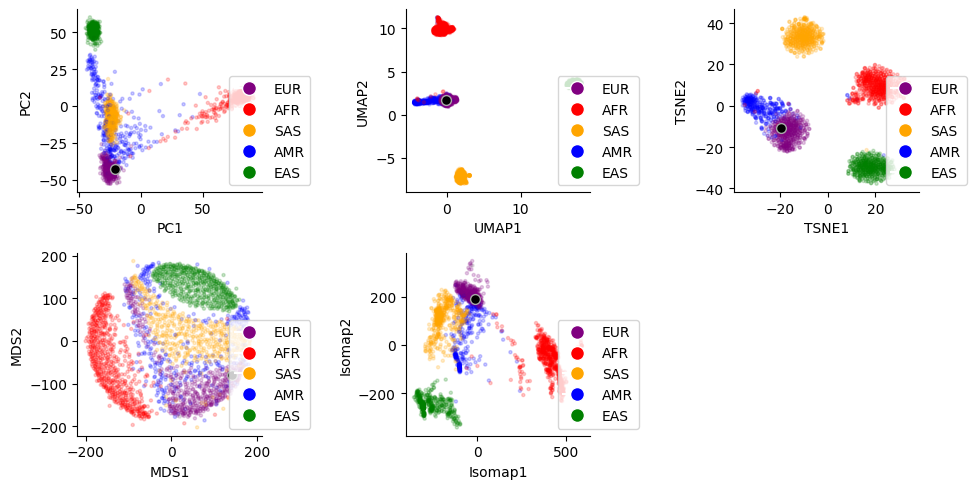

In [13]:
fignum = 1

iter_dict = {'PC':pca_df, 'UMAP':umap_df,'TSNE':tsne_df,'MDS':mds_df,'Isomap':isomap_df}

fig = plt.figure()
fig.set_size_inches((10, 5))
for pre in iter_dict:
    ax = fig.add_subplot(2, 3, fignum)
    tmpi = iter_dict[pre]
    PlotClusters(tmpi, 1, 2, pre, "superpop", ["mgymrek"], ax=ax)
    fignum += 1
fig.tight_layout()